# Using ChatGPT to create visual representations of the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Dummy data uploaded to ChatGPT

In [6]:
path = "./resources/dummy_data.csv"
data = pd.read_csv(path)

In [3]:
data.head(n=10)

,num_shots,model,run_id,accuracy
0,2,A,1,0.289588
1,2,A,2,0.326426
2,2,A,3,0.128729
3,2,A,4,0.682322
4,2,A,5,0.299879
5,2,B,1,0.554652
6,2,B,2,0.752196
7,2,B,3,0.674190
8,2,B,4,0.648283
9,2,B,5,0.553891


## Instruction to ChatGPT

* In Japanese

```
アップロードしたCSVファイルを折れ線グラフで可視化してください．仕様は以下の通りです．
* modelごとに系列を分けてください
* num_shotsをX軸，accuracyをY軸にしてください
* accuracyの標準偏差をエラーバーにしてください
```

* In English

```
Create a line chart from the uploaded CSV file using the following specifications:
* Plot separate series for each model.
* Use 'num_shots' as the X-axis and 'accuracy' as the Y-axis.
* Include the standard deviation of accuracy as an error bar.
```

## Actual dialogue with ChatGPT
* [Click here](https://chat.openai.com/share/85395970-e88d-4518-96e2-e22f36dac7d6)

## Generated code by ChatGPT

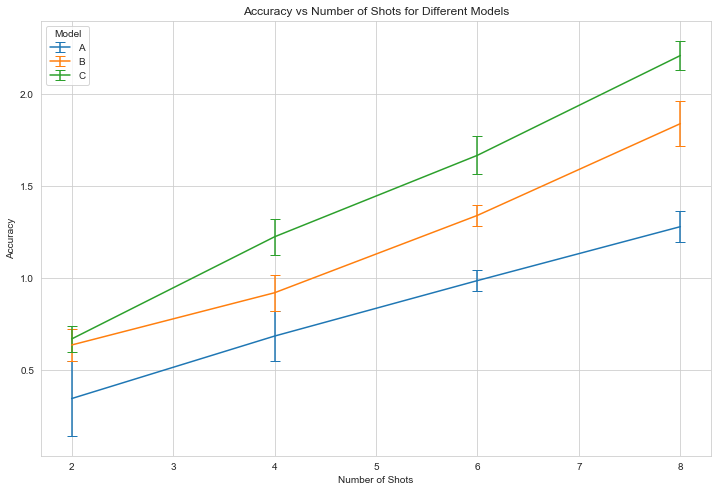

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping the data by 'model' and 'num_shots', and calculating mean and standard deviation of 'accuracy'
grouped_data = data.groupby(['model', 'num_shots'])['accuracy'].agg(['mean', 'std']).reset_index()

# Plotting the data
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Plotting each model's mean accuracy with error bars representing the standard deviation
for model in grouped_data['model'].unique():
    model_data = grouped_data[grouped_data['model'] == model]
    plt.errorbar(model_data['num_shots'], model_data['mean'], yerr=model_data['std'], label=model, capsize=5)

plt.xlabel('Number of Shots')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Shots for Different Models')
plt.legend(title='Model')
plt.show()